In [536]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
#to plot the graphs inline on jupyter notebook

In [537]:
data = pd.read_csv('train.csv')
#data = pd.read_csv('test.csv')

In [538]:
data = data.set_index(data['PassengerId'])

In [539]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [540]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [541]:
import string
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if str.find(big_string, substring) != -1:
            return substring
    print(big_string)
    return np.nan

In [542]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

In [543]:
data['Title']=data['Name'].map(lambda x: substrings_in_string(x, title_list))

In [544]:
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
data['Title']=data.apply(replace_titles, axis=1)

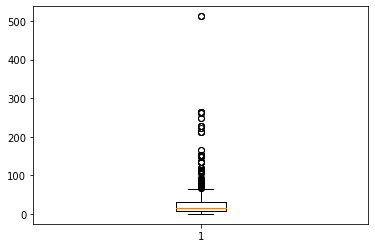

In [545]:
plt.boxplot(data['Fare'])
plt.show()

In [546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 97.5+ KB


In [547]:
data['Age'].median()

28.0

In [548]:
data['Age'].fillna(value = data.Age.mean(), inplace = True)

In [549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 97.5+ KB


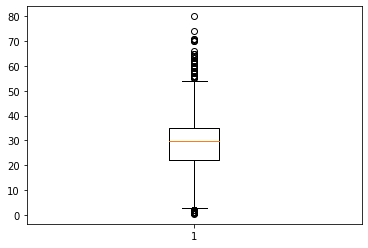

In [550]:
plt.boxplot(data['Age'])
plt.show()

In [551]:
def replace_cabin(x):
    cabin = x['Cabin']
    if (cabin == 'NoCabin'):
        return 'NoCabin'
    else:
        return 'Cabin'

In [552]:
data.Cabin.fillna(value='NoCabin', inplace = True)

In [553]:
data['Cabin'] = data.apply(replace_cabin, axis = 1)

In [554]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NoCabin,S,Mr
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cabin,C,Mrs
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NoCabin,S,Miss
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Cabin,S,Mrs
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NoCabin,S,Mr


In [555]:
data.drop(['Name','Ticket'],axis=1, inplace = True)

In [556]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,1,0,3,male,22.0,1,0,7.2500,NoCabin,S,Mr
2,2,1,1,female,38.0,1,0,71.2833,Cabin,C,Mrs
3,3,1,3,female,26.0,0,0,7.9250,NoCabin,S,Miss
4,4,1,1,female,35.0,1,0,53.1000,Cabin,S,Mrs
5,5,0,3,male,35.0,0,0,8.0500,NoCabin,S,Mr


In [557]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     889 non-null    object 
 10  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


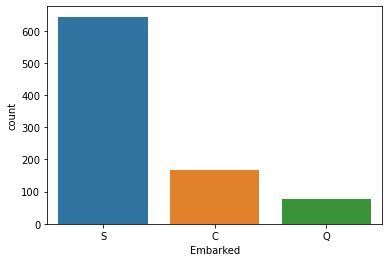

In [558]:
sns.countplot(x='Embarked',data=data)

In [559]:
data['Embarked'].fillna(value = "S", inplace = True)

In [560]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    object 
 10  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


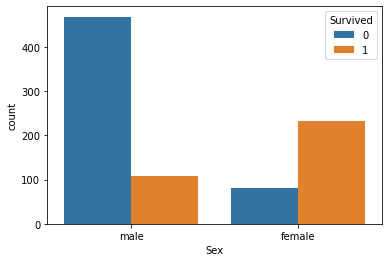

In [561]:
sns.countplot(x='Sex',hue='Survived',data=data)

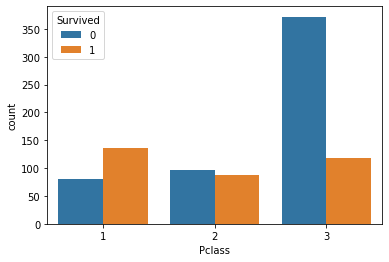

In [562]:
sns.countplot(x='Pclass',hue='Survived',data=data)

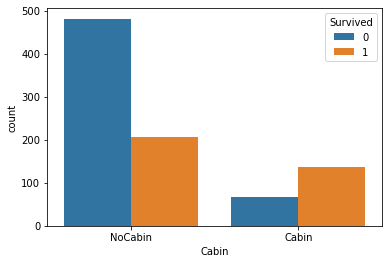

In [563]:
sns.countplot(x='Cabin',hue='Survived',data=data)

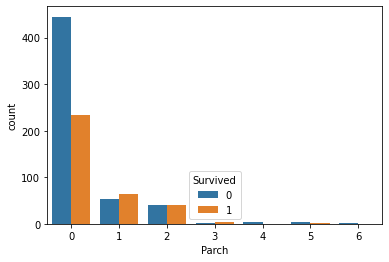

In [564]:
sns.countplot(x='Parch',hue='Survived',data=data)

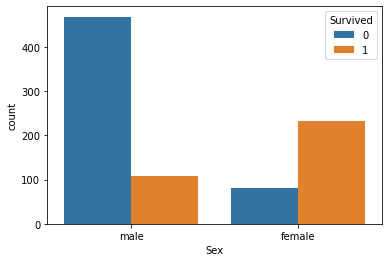

In [565]:
sns.countplot(x='Sex',hue='Survived', data = data)

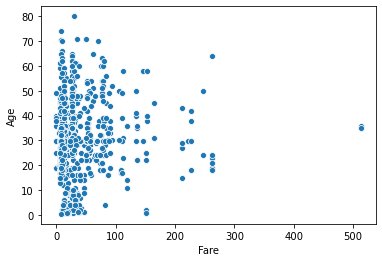

In [566]:
sns.scatterplot(x='Fare',y='Age' , data=data)

In [567]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,1,0,3,male,22.0,1,0,7.2500,NoCabin,S,Mr
2,2,1,1,female,38.0,1,0,71.2833,Cabin,C,Mrs
3,3,1,3,female,26.0,0,0,7.9250,NoCabin,S,Miss
4,4,1,1,female,35.0,1,0,53.1000,Cabin,S,Mrs
5,5,0,3,male,35.0,0,0,8.0500,NoCabin,S,Mr


In [568]:
data = pd.get_dummies(data,columns=["Sex","Cabin","Embarked","Title"])

In [569]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_Cabin,Cabin_NoCabin,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,,,,,,,,,,,,,,
1,1,0,3,22.0,1,0,7.2500,0,1,0,1,0,0,1,0,0,1,0
2,2,1,1,38.0,1,0,71.2833,1,0,1,0,1,0,0,0,0,0,1
3,3,1,3,26.0,0,0,7.9250,1,0,0,1,0,0,1,0,1,0,0
4,4,1,1,35.0,1,0,53.1000,1,0,1,0,0,0,1,0,0,0,1
5,5,0,3,35.0,0,0,8.0500,0,1,0,1,0,0,1,0,0,1,0


In [570]:
from sklearn.model_selection import train_test_split

In [571]:
X = data.drop(['PassengerId','Survived'], axis = 1)
y = data['Survived']

In [572]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

In [573]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [574]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [575]:
# Making predictions
predictions = rfc.predict(X_test)

In [576]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [577]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       159
           1       0.81      0.75      0.78       109

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [578]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[140  19]
 [ 27  82]]


In [579]:
print(accuracy_score(y_test,predictions))

0.8283582089552238


In [580]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [581]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.427756,0.053137,0.032581,0.003720,2,{'max_depth': 2},0.760,0.816,0.808,0.790323,...,0.794542,0.019325,2,0.807229,0.791165,0.795181,0.795591,0.795591,0.796951,0.005403
1,0.362934,0.079247,0.034381,0.014966,7,{'max_depth': 7},0.784,0.816,0.856,0.822581,...,0.813781,0.025698,1,0.911647,0.911647,0.893574,0.897796,0.921844,0.907301,0.010277
2,0.357876,0.090583,0.023986,0.004513,12,{'max_depth': 12},0.776,0.800,0.840,0.790323,...,0.792877,0.027476,3,0.981928,0.975904,0.971888,0.971944,0.983968,0.977126,0.005013
3,0.383515,0.098900,0.025585,0.005638,17,{'max_depth': 17},0.768,0.800,0.832,0.741935,...,0.775161,0.036627,4,0.991968,0.993976,0.991968,0.995992,0.995992,0.993979,0.001800


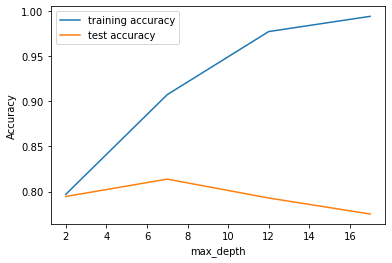

In [582]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [583]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_leaf': range(2, 20, 5)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [584]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.257253,0.040505,0.017190,0.003427,2,{'min_samples_leaf': 2},0.768,0.808,0.840,0.822581,...,0.805781,0.024998,3,0.907631,0.919679,0.901606,0.897796,0.907816,0.906905,0.007424
1,0.202648,0.008974,0.013998,0.000900,7,{'min_samples_leaf': 7},0.776,0.824,0.832,0.814516,...,0.805755,0.022521,4,0.855422,0.867470,0.839357,0.853707,0.863727,0.855937,0.009735
2,0.209883,0.011498,0.016192,0.002035,12,{'min_samples_leaf': 12},0.768,0.840,0.816,0.822581,...,0.807381,0.025342,2,0.831325,0.837349,0.829317,0.823647,0.843687,0.833065,0.006884
3,0.483317,0.029351,0.042602,0.013874,17,{'min_samples_leaf': 17},0.768,0.840,0.816,0.814516,...,0.810606,0.023405,1,0.829317,0.821285,0.821285,0.823647,0.817635,0.822634,0.003855


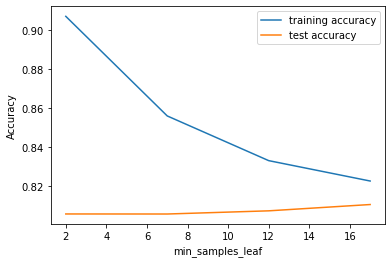

In [585]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [586]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_split': range(2, 200, 50)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(2, 200, 50)},
             return_train_score=True, scoring='accuracy')

In [587]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.402920,0.118839,0.028945,0.012031,2,{'min_samples_split': 2},0.760,0.800,0.840,0.766129,...,0.786452,0.030255,4,0.993976,0.993976,0.991968,0.995992,0.995992,0.994381,0.001506
1,0.324570,0.061765,0.023587,0.005424,52,{'min_samples_split': 52},0.768,0.840,0.848,0.822581,...,0.820232,0.027932,1,0.837349,0.831325,0.825301,0.835671,0.849699,0.835869,0.008073
2,0.260373,0.015774,0.018589,0.003929,102,{'min_samples_split': 102},0.768,0.808,0.840,0.790323,...,0.800942,0.023579,2,0.811245,0.801205,0.791165,0.809619,0.805611,0.803769,0.007197
3,0.306030,0.054024,0.021388,0.002726,152,{'min_samples_split': 152},0.768,0.792,0.808,0.790323,...,0.792955,0.014416,3,0.809237,0.795181,0.787149,0.807615,0.801603,0.800157,0.008175


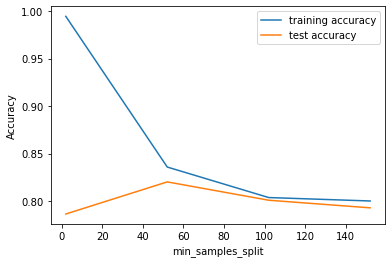

In [588]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [589]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_features': range(1, 15, 1)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 15)}, return_train_score=True,
             scoring='accuracy')

In [590]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.227470,0.011674,0.017394,0.001861,1,{'max_features': 1},0.752,0.808,0.816,0.758065,...,0.780039,0.026599,12,0.993976,0.993976,0.989960,0.995992,0.995992,0.993979,0.002203
1,0.222275,0.011038,0.017793,0.001595,2,{'max_features': 2},0.760,0.792,0.824,0.750000,...,0.775200,0.028861,14,0.993976,0.993976,0.991968,0.995992,0.995992,0.994381,0.001506
2,0.297558,0.080512,0.021187,0.008904,3,{'max_features': 3},0.760,0.792,0.832,0.758065,...,0.781639,0.027958,10,0.993976,0.993976,0.991968,0.995992,0.995992,0.994381,0.001506
3,0.445547,0.072697,0.034199,0.011926,4,{'max_features': 4},0.784,0.776,0.832,0.750000,...,0.781626,0.027623,11,0.993976,0.993976,0.991968,0.995992,0.995992,0.994381,0.001506
4,0.381416,0.088211,0.027688,0.007067,5,{'max_features': 5},0.776,0.784,0.840,0.774194,...,0.788065,0.026582,8,0.993976,0.993976,0.991968,0.995992,0.995992,0.994381,0.001506


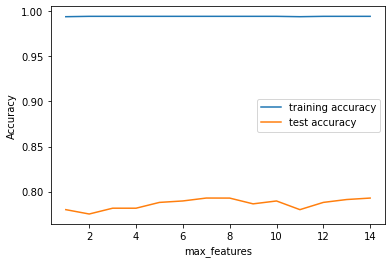

In [591]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [592]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'n_estimators': range(1, 100, 10)}
# instantiate the model
rf = RandomForestClassifier()
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(1, 100, 10)},
             return_train_score=True, scoring='accuracy')

In [593]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007795,0.001719,0.004598,0.001198,1,{'n_estimators': 1},0.728,0.744,0.768,0.750000,...,0.736710,0.025090,10,0.903614,0.901606,0.881526,0.919840,0.911824,0.903682,0.012826
1,0.036981,0.006720,0.006396,0.002245,11,{'n_estimators': 11},0.720,0.768,0.848,0.750000,...,0.767200,0.043241,9,0.979920,0.979920,0.979920,0.975952,0.983968,0.979936,0.002535
2,0.063960,0.002609,0.007947,0.002684,21,{'n_estimators': 21},0.760,0.792,0.840,0.790323,...,0.788077,0.029683,1,0.983936,0.989960,0.983936,0.993988,0.989980,0.988360,0.003899
3,0.123729,0.034606,0.013991,0.005096,31,{'n_estimators': 31},0.760,0.792,0.856,0.758065,...,0.783213,0.039114,4,0.993976,0.993976,0.989960,0.991984,0.995992,0.993178,0.002048
4,0.250743,0.034572,0.017390,0.004266,41,{'n_estimators': 41},0.760,0.776,0.840,0.741935,...,0.775200,0.034149,8,0.993976,0.993976,0.985944,0.995992,0.991984,0.992374,0.003456


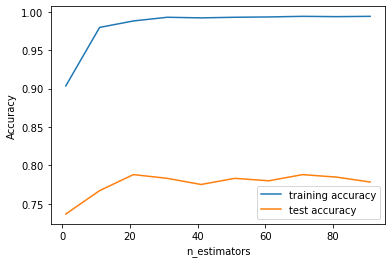

In [594]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [595]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=2, 
                             min_samples_split=50,
                             max_features=7,
                             n_estimators=10)

In [596]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, max_features=7, min_samples_leaf=2,
                       min_samples_split=50, n_estimators=10)

In [597]:
# Making predictions
predictions = rfc.predict(X_test)

In [598]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86       159
           1       0.85      0.70      0.77       109

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.82       268



In [599]:
print(accuracy_score(y_test,predictions))

0.8283582089552238


# XGBoosting

In [600]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Fitting the XGBClassifier
xgb1 = XGBClassifier(use_label_encoder=False)

In [601]:
# Model fit and performance on Train data
xgb1.fit( X_train,y_train)

[11:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [602]:
# Making predictions
predictions = xgb1.predict(X_test)

C:\Users\narottam\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [603]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       159
           1       0.74      0.73      0.74       109

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [604]:
print(accuracy_score(y_test,predictions))

0.7873134328358209


In [605]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(1, 20, 2)}
# instantiate the model
xgb1 = XGBClassifier(use_label_encoder=False)
#rf = RandomForestClassifier()
# fit tree on training data
xgb1 = GridSearchCV(xgb1, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
xgb1.fit(X_train, y_train)

C:\Users\narottam\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[11:21:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [606]:
# scores of GridSearch CV
scores = xgb1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.082751,0.006108,0.007397,0.001020,1,{'max_depth': 1},0.736,0.816,0.864,0.822581,...,0.813845,0.042281,1,0.835341,0.843373,0.833333,0.847695,0.843687,0.840686,0.005440
1,0.131524,0.014396,0.009195,0.003653,3,{'max_depth': 3},0.768,0.776,0.840,0.798387,...,0.796155,0.025025,2,0.945783,0.955823,0.933735,0.941884,0.935872,0.942619,0.007866
2,0.141719,0.004532,0.006796,0.000399,5,{'max_depth': 5},0.784,0.728,0.840,0.790323,...,0.780077,0.037169,3,0.985944,0.985944,0.979920,0.981964,0.989980,0.984750,0.003501
3,0.176594,0.006771,0.007002,0.000010,7,{'max_depth': 7},0.776,0.736,0.800,0.741935,...,0.768852,0.025636,10,0.991968,0.991968,0.991968,0.991984,0.995992,0.992776,0.001608
4,0.200128,0.007546,0.007606,0.000498,9,{'max_depth': 9},0.768,0.760,0.792,0.750000,...,0.772065,0.016611,6,0.991968,0.991968,0.991968,0.993988,0.993988,0.992776,0.000990


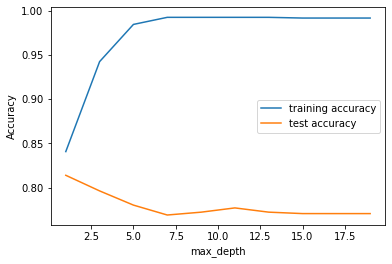

In [607]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [608]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'n_estimators': range(1, 400, 100)}
# instantiate the model
xgb1 = XGBClassifier(use_label_encoder=False)
#rf = RandomForestClassifier()
# fit tree on training data
xgb1 = GridSearchCV(xgb1, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
xgb1.fit(X_train, y_train)

[11:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\narottam\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[11:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [609]:
# scores of GridSearch CV
scores = xgb1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038377,0.016393,0.008595,0.002331,1,{'n_estimators': 1},0.776,0.808,0.864,0.822581,...,0.802503,0.041439,1,0.871486,0.881526,0.855422,0.863727,0.887776,0.871987,0.011689
1,0.230823,0.047529,0.006996,0.000632,101,{'n_estimators': 101},0.776,0.736,0.832,0.758065,...,0.776865,0.031916,2,0.991968,0.989960,0.989960,0.987976,0.989980,0.989969,0.001262
2,0.308623,0.023595,0.007196,0.000400,201,{'n_estimators': 201},0.760,0.728,0.808,0.741935,...,0.765652,0.029712,3,0.991968,0.989960,0.991968,0.993988,0.995992,0.992775,0.002052
3,0.445554,0.031692,0.006997,0.000896,301,{'n_estimators': 301},0.760,0.720,0.808,0.741935,...,0.764052,0.031836,4,0.991968,0.991968,0.991968,0.993988,0.995992,0.993177,0.001610


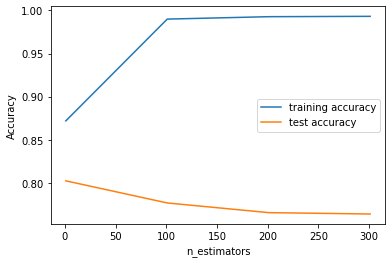

In [610]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [611]:
print(accuracy_score(y_test,predictions))

0.7873134328358209


In [612]:
xgb1 = XGBClassifier(use_label_encoder=False,max_depth=3,n_estimators=50)


In [613]:
# Model fit and performance on Train data
xgb1.fit( X_train,y_train)

[11:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [614]:
# Making predictions
predictions = xgb1.predict(X_test)

C:\Users\narottam\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [615]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       159
           1       0.83      0.73      0.78       109

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [616]:
print(accuracy_score(y_test,predictions))

0.832089552238806


In [617]:
predictions

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0])

In [618]:
y_test

PassengerId
206    0
45     1
822    1
459    1
796    0
      ..
112    0
731    1
106    0
480    1
278    0
Name: Survived, Length: 268, dtype: int64

In [622]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(xgb1, open(filename, 'wb'))


In [621]:
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6002 sha256=f30e4727be78e7041787a6e5546c70783f8a83a25dfbc821ad77b2ae552f8f26
  Stored in directory: c:\users\narottam\appdata\local\pip\cache\wheels\2a\a4\6c\83bfbc3b94f1bb43d634b07a6a893fd437a45c58b29aea5142
Successfully built pickle-mixin
